# 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
Q_matlab = np.array([
    0, 1, 2, 4, 8, 16, 32, 3, 5, 64, 9, 6, 17, 10, 18, 128, 12, 33, 65, 20, 256, 34, 24, 36, 7, 129, 66, 512, 11, 40, 68, 130,
    19, 13, 48, 14, 72, 257, 21, 132, 35, 258, 26, 513, 80, 37, 25, 22, 136, 260, 264, 38, 514, 96, 67, 41, 144, 28, 69, 42,
    516, 49, 74, 272, 160, 520, 288, 528, 192, 544, 70, 44, 131, 81, 50, 73, 15, 320, 133, 52, 23, 134, 384, 76, 137, 82, 56, 27,
    97, 39, 259, 84, 138, 145, 261, 29, 43, 98, 515, 88, 140, 30, 146, 71, 262, 265, 161, 576, 45, 100, 640, 51, 148, 46, 75, 266,
    273, 517, 104, 162, 53, 193, 152, 77, 164, 768, 268, 274, 518, 54, 83, 57, 521, 112, 135, 78, 289, 194, 85, 276, 522, 58, 168,
    139, 99, 86, 60, 280, 89, 290, 529, 524, 196, 141, 101, 147, 176, 142, 530, 321, 31, 200, 90, 545, 292, 322, 532, 263, 149, 102,
    105, 304, 296, 163, 92, 47, 267, 385, 546, 324, 208, 386, 150, 153, 165, 106, 55, 328, 536, 577, 548, 113, 154, 79, 269, 108,
    578, 224, 166, 519, 552, 195, 270, 641, 523, 275, 580, 291, 59, 169, 560, 114, 277, 156, 87, 197, 116, 170, 61, 531, 525, 642,
    281, 278, 526, 177, 293, 388, 91, 584, 769, 198, 172, 120, 201, 336, 62, 282, 143, 103, 178, 294, 93, 644, 202, 592, 323, 392,
    297, 770, 107, 180, 151, 209, 284, 648, 94, 204, 298, 400, 608, 352, 325, 533, 155, 210, 305, 547, 300, 109, 184, 534, 537, 115,
    167, 225, 326, 306, 772, 157, 656, 329, 110, 117, 212, 171, 776, 330, 226, 549, 538, 387, 308, 216, 416, 271, 279, 158, 337,
    550, 672, 118, 332, 579, 540, 389, 173, 121, 553, 199, 784, 179, 228, 338, 312, 704, 390, 174, 554, 581, 393, 283, 122, 448,
    353, 561, 203, 63, 340, 394, 527, 582, 556, 181, 295, 285, 232, 124, 205, 182, 643, 562, 286, 585, 299, 354, 211, 401, 185, 396,
    344, 586, 645, 593, 535, 240, 206, 95, 327, 564, 800, 402, 356, 307, 301, 417, 213, 568, 832, 588, 186, 646, 404, 227, 896, 594,
    418, 302, 649, 771, 360, 539, 111, 331, 214, 309, 188, 449, 217, 408, 609, 596, 551, 650, 229, 159, 420, 310, 541, 773, 610, 657,
    333, 119, 600, 339, 218, 368, 652, 230, 391, 313, 450, 542, 334, 233, 555, 774, 175, 123, 658, 612, 341, 777, 220, 314, 424,
    395, 673, 583, 355, 287, 183, 234, 125, 557, 660, 616, 342, 316, 241, 778, 563, 345, 452, 397, 403, 207, 674, 558, 785, 432,
    357, 187, 236, 664, 624, 587, 780, 705, 126, 242, 565, 398, 346, 456, 358, 405, 303, 569, 244, 595, 189, 566, 676, 361, 706,
    589, 215, 786, 647, 348, 419, 406, 464, 680, 801, 362, 590, 409, 570, 788, 597, 572, 219, 311, 708, 598, 601, 651, 421, 792,
    802, 611, 602, 410, 231, 688, 653, 248, 369, 190, 364, 654, 659, 335, 480, 315, 221, 370, 613, 422, 425, 451, 614, 543, 235,
    412, 343, 372, 775, 317, 222, 426, 453, 237, 559, 833, 804, 712, 834, 661, 808, 779, 617, 604, 433, 720, 816, 836, 347, 897,
    243, 662, 454, 318, 675, 618, 898, 781, 376, 428, 665, 736, 567, 840, 625, 238, 359, 457, 399, 787, 591, 678, 434, 677, 349,
    245, 458, 666, 620, 363, 127, 191, 782, 407, 436, 626, 571, 465, 681, 246, 707, 350, 599, 668, 790, 460, 249, 682, 573, 411,
    803, 789, 709, 365, 440, 628, 689, 374, 423, 466, 793, 250, 371, 481, 574, 413, 603, 366, 468, 655, 900, 805, 615, 684, 710,
    429, 794, 252, 373, 605, 848, 690, 713, 632, 482, 806, 427, 904, 414, 223, 663, 692, 835, 619, 472, 455, 796, 809, 714, 721,
    837, 716, 864, 810, 606, 912, 722, 696, 377, 435, 817, 319, 621, 812, 484, 430, 838, 667, 488, 239, 378, 459, 622, 627, 437,
    380, 818, 461, 496, 669, 679, 724, 841, 629, 351, 467, 438, 737, 251, 462, 442, 441, 469, 247, 683, 842, 738, 899, 670, 783,
    849, 820, 728, 928, 791, 367, 901, 630, 685, 844, 633, 711, 253, 691, 824, 902, 686, 740, 850, 375, 444, 470, 483, 415, 485,
    905, 795, 473, 634, 744, 852, 960, 865, 693, 797, 906, 715, 807, 474, 636, 694, 254, 717, 575, 913, 798, 811, 379, 697, 431,
    607, 489, 866, 723, 486, 908, 718, 813, 476, 856, 839, 725, 698, 914, 752, 868, 819, 814, 439, 929, 490, 623, 671, 739, 916,
    463, 843, 381, 497, 930, 821, 726, 961, 872, 492, 631, 729, 700, 443, 741, 845, 920, 382, 822, 851, 730, 498, 880, 742, 445,
    471, 635, 932, 687, 903, 825, 500, 846, 745, 826, 732, 446, 962, 936, 475, 853, 867, 637, 907, 487, 695, 746, 828, 753, 854,
    857, 504, 799, 255, 964, 909, 719, 477, 915, 638, 748, 944, 869, 491, 699, 754, 858, 478, 968, 383, 910, 815, 976, 870, 917,
    727, 493, 873, 701, 931, 756, 860, 499, 731, 823, 922, 874, 918, 502, 933, 743, 760, 881, 494, 702, 921, 501, 876, 847, 992,
    447, 733, 827, 934, 882, 937, 963, 747, 505, 855, 924, 734, 829, 965, 938, 884, 506, 749, 945, 966, 755, 859, 940, 830, 911,
    871, 639, 888, 479, 946, 750, 969, 508, 861, 757, 970, 919, 875, 862, 758, 948, 977, 923, 972, 761, 877, 952, 495, 703, 935,
    978, 883, 762, 503, 925, 878, 735, 993, 885, 939, 994, 980, 926, 764, 941, 967, 886, 831, 947, 507, 889, 984, 751, 942, 996,
    971, 890, 509, 949, 973, 1000, 892, 950, 863, 759, 1008, 510, 979, 953, 763, 974, 954, 879, 981, 982, 927, 995, 765, 956, 887,
    985, 997, 986, 943, 891, 998, 766, 511, 988, 1001, 951, 1002, 893, 975, 894, 1009, 955, 1004, 1010, 957, 983, 958, 987, 1012,
    999, 1016, 767, 989, 1003, 990, 1005, 959, 1011, 1013, 895, 1006, 1014, 1017, 1018, 991, 1020, 1007, 1015, 1019, 1021, 1022, 1023
])

# 1. Funktions

In [3]:
def f_minsum(a, b):
    """
    Calculates the f-function for polar decoding, which is an approximation of the min-sum operation.

    Args:
        a (np.array or float): First input (LLR).
        b (np.array or float): Second input (LLR).

    Returns:
        np.array or float: Result of the f-function, approximating min(|a|, |b|) with appropriate sign.
    """
    return (1-2*(a<0))*(1-2*(b<0))*np.minimum(np.abs(a),np.abs(b))

def g_function(a, b, c):
    """
    Calculates the g-function for polar decoding.

    Args:
        a (np.array or float): First input (LLR from the left child).
        b (np.array or float): Second input (LLR from the right child).
        c (np.array or int): Hard decision from the left child's decoder output.

    Returns:
        np.array or float: Result of the g-function.
    """
    return b + (1 - 2 * c) * a

def polar_encode(u):
    """
    Encodes a message vector 'u' using the polar encoding scheme.

    Args:
        u (np.array): The message vector to be encoded. Its length must be a power of 2.

    Returns:
        np.array: The polar-encoded codeword.
    """
    N = len(u)
    # n is log2(N), representing the number of stages in the encoding process.
    n = int(np.log2(N))
    x = u.copy()
    m = 1  # Represents the current block size being processed.

    # Iterate through the encoding stages from n-1 down to 0.
    for d in range(n - 1, -1, -1):
        # Iterate through the blocks of size 2*m.
        for i in range(0, N, 2 * m):
            # Split the current block into two sub-blocks.
            a = x[i : i + m]
            b = x[i + m : i + 2 * m]
            # Apply the polar transform: (a+b)%2 for the left part, b for the right part.
            x[i : i + 2 * m] = np.concatenate(((a + b) % 2, b))
        # Double the block size for the next stage.
        m *= 2
    return x

def polar_sc_decode(received_llrs, N, n, is_frozen):
    """
    Decodes a received Log-Likelihood Ratio (LLR) vector using the Successive Cancellation (SC) algorithm.

    Args:
        received_llrs (np.array): The vector of Log-Likelihood Ratios (LLRs) from the channel.
        N (int): The codeword length.
        n (int): The number of decoding stages (log2(N)).
        is_frozen (np.array): A boolean array of length N, indicating which indices are "frozen" bits.

    Returns:
        np.array: The decoded vector u_hat of length N.
    """

    # Initialize data structures for the decoder
    # L stores LLRs at each level of the decoding tree. Dimensions: (n+1) x N.
    L = np.zeros((n + 1, N))
    # ucap stores hard bit decisions. Dimensions: (n+1) x N.
    ucap = np.zeros((n + 1, N), dtype=int)
    # ns stores the state of each node in the decoding tree (0: go left, 1: go right, 2: go up).
    ns = np.zeros(2 * N - 1, dtype=int)

    # The LLRs at the root level are the received channel values.
    L[0, :] = received_llrs

    node = 0  # Current node index in the current depth level.
    depth = 0  # Current depth level in the decoding tree (0 is the root).
    done = False  # Flag to indicate if decoding is complete.

    while not done:
        # Check if a leaf node has been reached (maximum depth).
        if depth == n:
            # Determine the decoded bit based on whether it's a frozen bit or an information bit.
            if is_frozen[node]:
                # If the bit is frozen, its decision is known (0).
                ucap[n, node] = 0
            else:
                # Otherwise, the decision is based on the sign of the LLR.
                ucap[n, node] = 1 if L[n, node] < 0 else 0

            # Check if the last bit has been decoded.
            if node == N - 1:
                # If so, the decoding block is complete.
                done = True
            else:
                # Otherwise, go back to the parent node to continue decoding.
                node = node // 2
                depth -= 1
        else:
            # At an internal node (not a leaf node).
            # Calculate the linear index of the current node in the 'ns' array.
            npos = (2**depth - 1) + node
            # Calculate the current block size (temp) at this depth.
            temp = 2**(n - depth)

            if ns[npos] == 0:  # State 0: Descend to the left child.
                # Extract the LLRs for the current block at the current depth.
                Ln = L[depth, temp * node : temp * (node + 1)]
                # Split LLRs for left and right children.
                a, b = Ln[:temp//2], Ln[temp//2:]
                # Calculate LLRs for the left child using the f-function.
                L[depth + 1, (temp//2) * (2*node) : (temp//2) * (2*node + 1)] = f_minsum(a, b)
                # Update the state of the current node to 1 (meaning left child has been processed).
                ns[npos] = 1
                # Move to the left child.
                node *= 2
                depth += 1
            elif ns[npos] == 1:  # State 1: Descend to the right child.
                # Extract the LLRs for the current block at the current depth.
                Ln = L[depth, temp * node : temp * (node + 1)]
                # Split LLRs for left and right children.
                a, b = Ln[:temp//2], Ln[temp//2:]
                # Retrieve the hard decisions already made by the left child.
                ucapn = ucap[depth + 1, (temp//2) * (2*node) : (temp//2) * (2*node + 1)]
                # Calculate LLRs for the right child using the g-function, incorporating left child's decisions.
                L[depth + 1, (temp//2) * (2*node+1) : (temp//2) * (2*node+2)] = g_function(a, b, ucapn)
                # Update the state of the current node to 2 (meaning both children have been processed).
                ns[npos] = 2
                # Move to the right child.
                node = node * 2 + 1
                depth += 1
            else:  # ns[npos] == 2. State 2: Ascend to the parent node.
                lnode, rnode = 2 * node, 2 * node + 1
                # Retrieve the hard decisions from the left and right children.
                ucapl = ucap[depth + 1, (temp//2)*lnode : (temp//2)*(lnode+1)]
                ucapr = ucap[depth + 1, (temp//2)*rnode : (temp//2)*(rnode+1)]
                # Combine the decisions from both children to form the parent's decision.
                ucap[depth, temp*node:temp*(node+1)] = np.concatenate(((ucapl + ucapr) % 2, ucapr))
                # Move back to the parent node.
                node //= 2
                depth -= 1

    # The fully decoded vector u_hat is at the root of the decision tree (depth n).
    u_hat = ucap[n, :]
    return u_hat

# 2. Simulation

In [4]:
def run_simulation(N, K, EbNodB, target_errors=100, max_blocks=1000):
    """
    Runs a single simulation for given polar code parameters.
    This function utilizes the new, separate decoder function 'polar_sc_decode'.

    Args:
        N (int): Codeword length. Must be a power of 2.
        K (int): Number of information bits.
        EbNodB (float): Energy per bit to noise power spectral density ratio in dB.
        target_errors (int, optional): The target number of block errors to simulate. Defaults to 100.
        max_blocks (int, optional): The maximum number of blocks to simulate. Defaults to 100.

    Returns:
        tuple: A tuple containing:
            - BER (float): Bit Error Rate.
            - FER (float): Frame Error Rate (Block Error Rate).
            - blk_count (int): The total number of blocks simulated.
    """
    n = int(np.log2(N))  # Number of polar transform stages.
    Rate = K / N        # Code rate.
    EbNo = 10**(EbNodB / 10)  # Eb/No in linear scale.
    sigma = np.sqrt(1 / (2 * Rate * EbNo))  # Noise standard deviation for AWGN channel.

    # Prepare reliability sequence and indices.
    # Q_matlab is assumed to be a predefined global variable or imported.
    # It represents the reliability order of bit-channels.
    Q1 = Q_matlab[Q_matlab < N]
    # Frozen bits are the least reliable ones.
    frozen_indices = Q1[:N - K]
    # Message bits are the most reliable ones.
    message_indices = Q1[N - K:]
    # Create a boolean array to quickly check if a bit is frozen.
    is_frozen = np.zeros(N, dtype=bool)
    is_frozen[frozen_indices] = True

    Nbiterrs = 0  # Total number of bit errors.
    Nblkerrs = 0  # Total number of block errors.
    blk_count = 0  # Total number of simulated blocks.

    # Continue simulation until target errors or maximum blocks are reached.
    while Nblkerrs < target_errors and blk_count < max_blocks:
        blk_count += 1

        # 1. Generate and Encode
        # Generate random message bits.
        msg = np.random.randint(0, 2, K)
        # Place message bits into their designated positions in the input vector 'u'.
        u = np.zeros(N, dtype=int)
        u[message_indices] = msg
        # Encode the 'u' vector to get the codeword.
        cword = polar_encode(u)

        # 2. Modulation and Channel
        # BPSK modulation: 0 maps to 1, 1 maps to -1.
        s = 1 - 2 * cword
        # Add Additive White Gaussian Noise (AWGN) to the modulated signal.
        r = s + sigma * np.random.randn(N)

        # 3. Decoding the received vector 'r'.
        u_hat = polar_sc_decode(r, N, n, is_frozen)

        # 4. Error Counting
        # Extract the decoded message bits from the estimated 'u_hat' vector.
        msg_cap = u_hat[message_indices]
        # Count the number of bit errors by comparing transmitted and decoded message bits.
        Nerrs = np.sum(msg != msg_cap)
        if Nerrs > 0:
            Nbiterrs += Nerrs
            Nblkerrs += 1

    # Calculate Bit Error Rate (BER) and Frame Error Rate (FER).
    # Avoid division by zero if no blocks were simulated.
    BER = Nbiterrs / (K * blk_count) if blk_count > 0 else 0
    FER = Nblkerrs / blk_count if blk_count > 0 else 0

    return BER, FER, blk_count

In [5]:
# Define simulation configurations for various codeword lengths (N) and code rates (K).
sim_configs = {
    1024: {
        # Configs for N=1024
        "Rate 0.75 (K=768)": {"K": 768, "marker": "^-"},
        "Rate 0.50 (K=512)": {"K": 512, "marker": "o-"},
        "Rate 0.25 (K=256)": {"K": 256, "marker": "s-"}
    },
    512: {
        # Configs for N=512
        "Rate 0.75 (K=384)": {"K": 384, "marker": "^-"},
        "Rate 0.50 (K=256)": {"K": 256, "marker": "o-"},
        "Rate 0.25 (K=128)": {"K": 128, "marker": "s-"}
    },
    256: {
        # Configs for N=256
        "Rate 0.75 (K=192)": {"K": 192, "marker": "^-"},
        "Rate 0.50 (K=128)": {"K": 128, "marker": "o-"},
        "Rate 0.25 (K=64)":  {"K": 64, "marker": "s-"}
    },
    128: {
        # Configs for N=128
        "Rate 0.75 (K=96)": {"K": 96, "marker": "^-"},
        "Rate 0.50 (K=64)": {"K": 64, "marker": "o-"},
        "Rate 0.25 (K=32)": {"K": 32, "marker": "s-"}
    },
    64: {
        # Configs for N=64
        "Rate 0.75 (K=48)": {"K": 48, "marker": "^-"},
        "Rate 0.50 (K=32)": {"K": 32, "marker": "o-"},
        "Rate 0.25 (K=16)": {"K": 16, "marker": "s-"}
    },
    32: {
        # Configs for N=32
        "Rate 0.75 (K=24)": {"K": 24, "marker": "^-"},
        "Rate 0.50 (K=16)": {"K": 16, "marker": "o-"},
        "Rate 0.25 (K=8)":  {"K": 8, "marker": "s-"}
    },
    16: {
        # Configs for N=16
        "Rate 0.75 (K=12)": {"K": 12, "marker": "^-"},
        "Rate 0.50 (K=8)": {"K": 8, "marker": "o-"},
        "Rate 0.25 (K=4)":  {"K": 4, "marker": "s-"}
    }
}

# Eb/No range for the X-axis in dB
ebno_db_range = np.arange(0.5, 6.0, 0.5)

# A nested dictionary to store the results of all simulations
# NEW structure: {N: {config_name: {"ber": [...], "fer": [...]}}}
all_results = {}

print("--- STARTING PARAMETER COMPARISON ---")
overall_start_time = time.time()

# --- 2. Loop over all configurations ---

# Outer loop: Iterates over different codeword lengths (N)
for N, configs_for_N in sim_configs.items():
    print(f"\n===== Testing Codeword Length N={N} =====")

    # Initialize the results dictionary for the current N
    all_results[N] = {}

    # Inner loop: Iterates over the rate configurations for the current N
    for config_name, config_params in configs_for_N.items():
        K = config_params["K"]
        print(f"\n--- Simulating Configuration: {config_name} ---")

        # Lists to store the results for the current curve (BER and FER for all Eb/No values)
        ber_results = []
        fer_results = [] # ADDED: List for FER

        # Loop over all Eb/No values for the current configuration
        for ebno_db in ebno_db_range:
            point_start_time = time.time()
            # Call the run_simulation function to get BER, FER, and block count for the current Eb/No
            ber, fer, blks = run_simulation(N, K, ebno_db)
            point_end_time = time.time()

            # Output extended with FER
            print(f"  Eb/No={ebno_db:.1f} dB -> BER={ber:.6f}, FER={fer:.6f} (simulated {blks} blocks in {point_end_time - point_start_time:.2f}s)")
            ber_results.append(ber)
            fer_results.append(fer) # ADDED: Save FER value

        # Store both curves (BER and FER) in the results dictionary for the current configuration
        all_results[N][config_name] = {"ber": ber_results, "fer": fer_results}

overall_end_time = time.time()
print(f"\n--- SIMULATION COMPLETED in {overall_end_time - overall_start_time:.2f} seconds ---")

--- STARTING PARAMETER COMPARISON ---

===== Testing Codeword Length N=1024 =====

--- Simulating Configuration: Rate 0.75 (K=768) ---
  Eb/No=0.5 dB -> BER=0.478307, FER=1.000000 (simulated 100 blocks in 1.73s)
  Eb/No=1.0 dB -> BER=0.469284, FER=1.000000 (simulated 100 blocks in 1.45s)
  Eb/No=1.5 dB -> BER=0.434769, FER=0.970874 (simulated 103 blocks in 1.50s)
  Eb/No=2.0 dB -> BER=0.311154, FER=0.840336 (simulated 119 blocks in 1.73s)
  Eb/No=2.5 dB -> BER=0.123374, FER=0.452489 (simulated 221 blocks in 3.19s)
  Eb/No=3.0 dB -> BER=0.032448, FER=0.151286 (simulated 661 blocks in 9.56s)
  Eb/No=3.5 dB -> BER=0.003089, FER=0.031000 (simulated 1000 blocks in 14.47s)
  Eb/No=4.0 dB -> BER=0.000255, FER=0.004000 (simulated 1000 blocks in 14.78s)
  Eb/No=4.5 dB -> BER=0.000042, FER=0.001000 (simulated 1000 blocks in 16.29s)
  Eb/No=5.0 dB -> BER=0.000000, FER=0.000000 (simulated 1000 blocks in 15.22s)
  Eb/No=5.5 dB -> BER=0.000000, FER=0.000000 (simulated 1000 blocks in 18.39s)

--- Sim

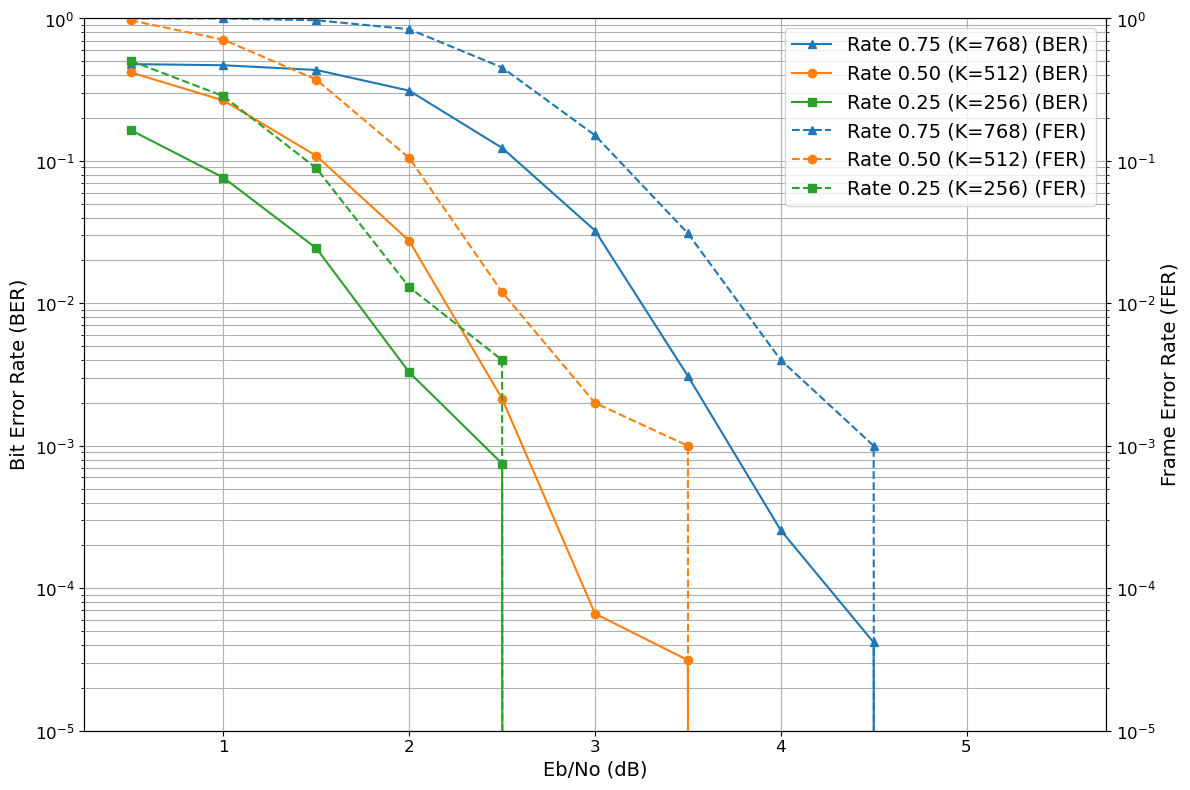

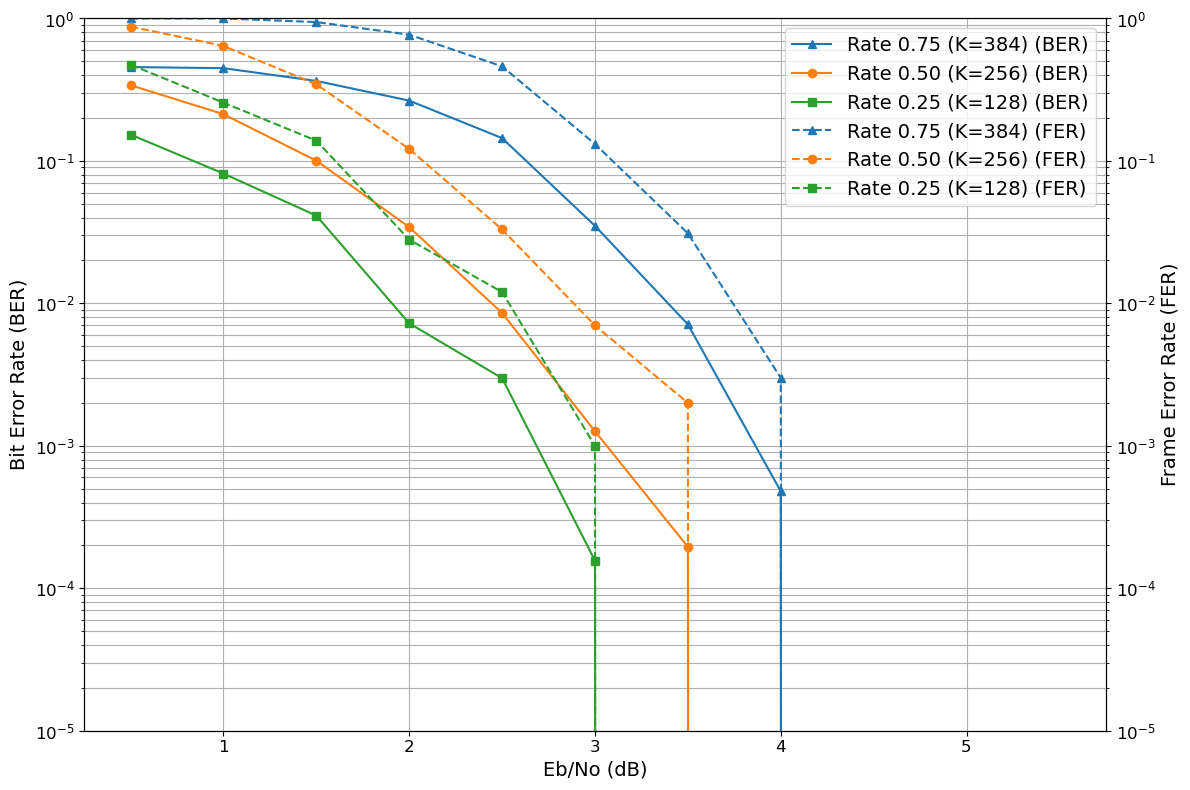

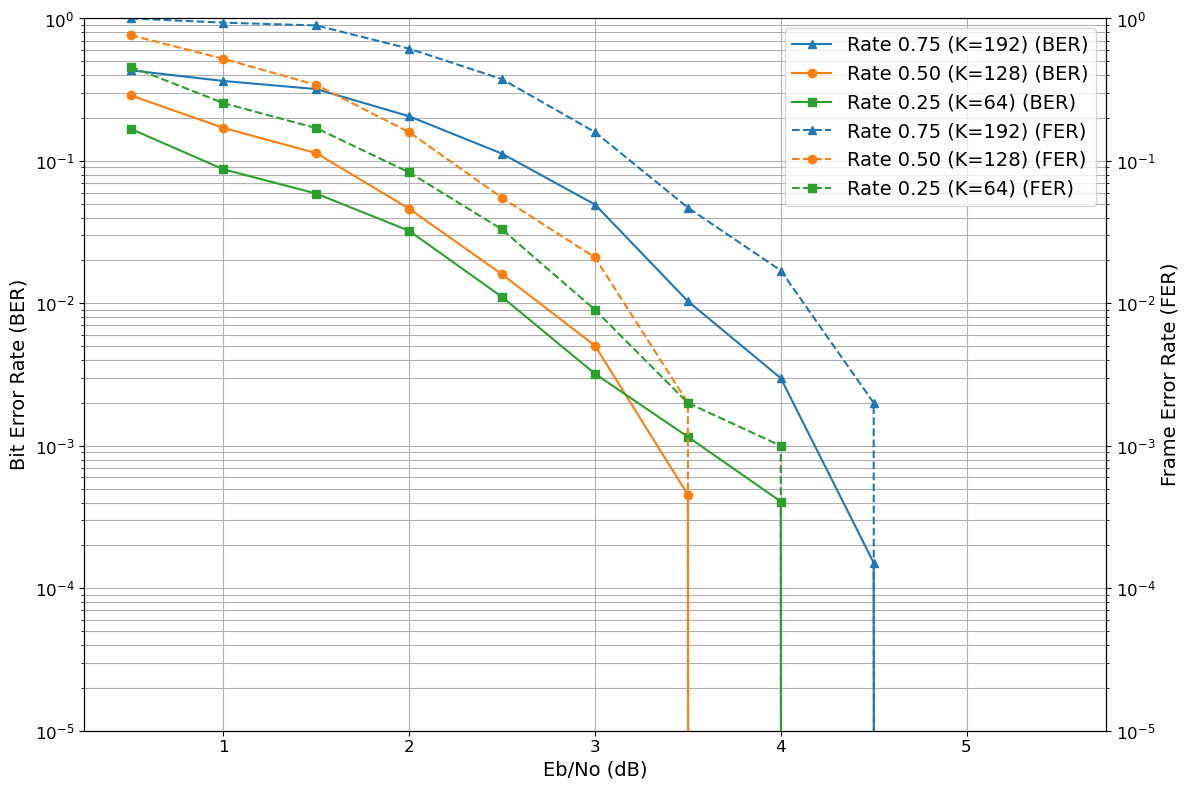

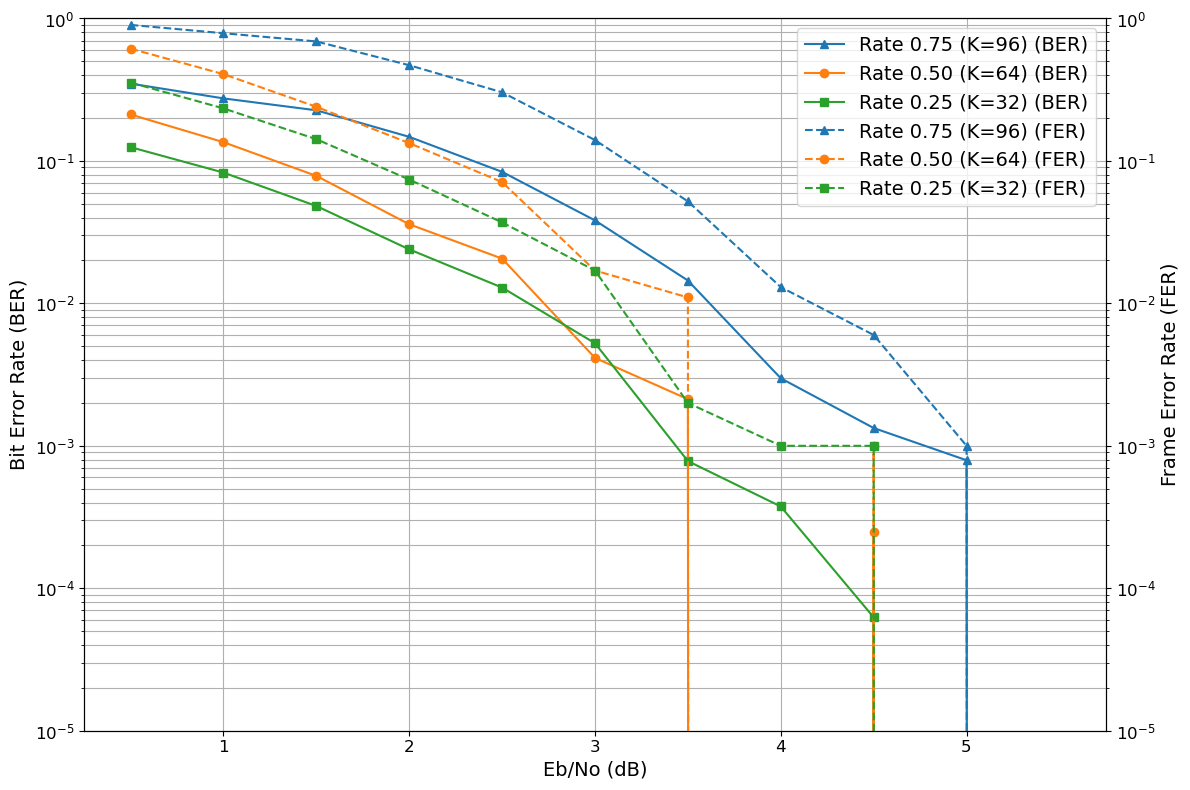

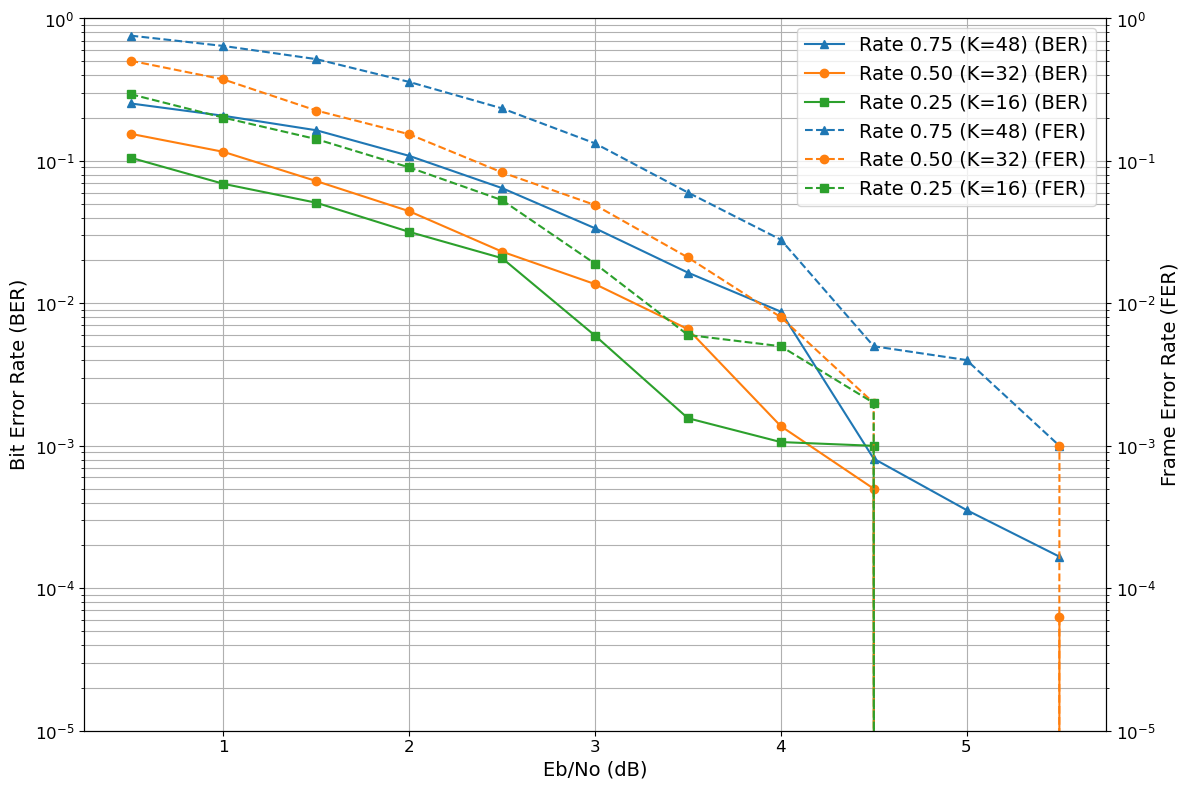

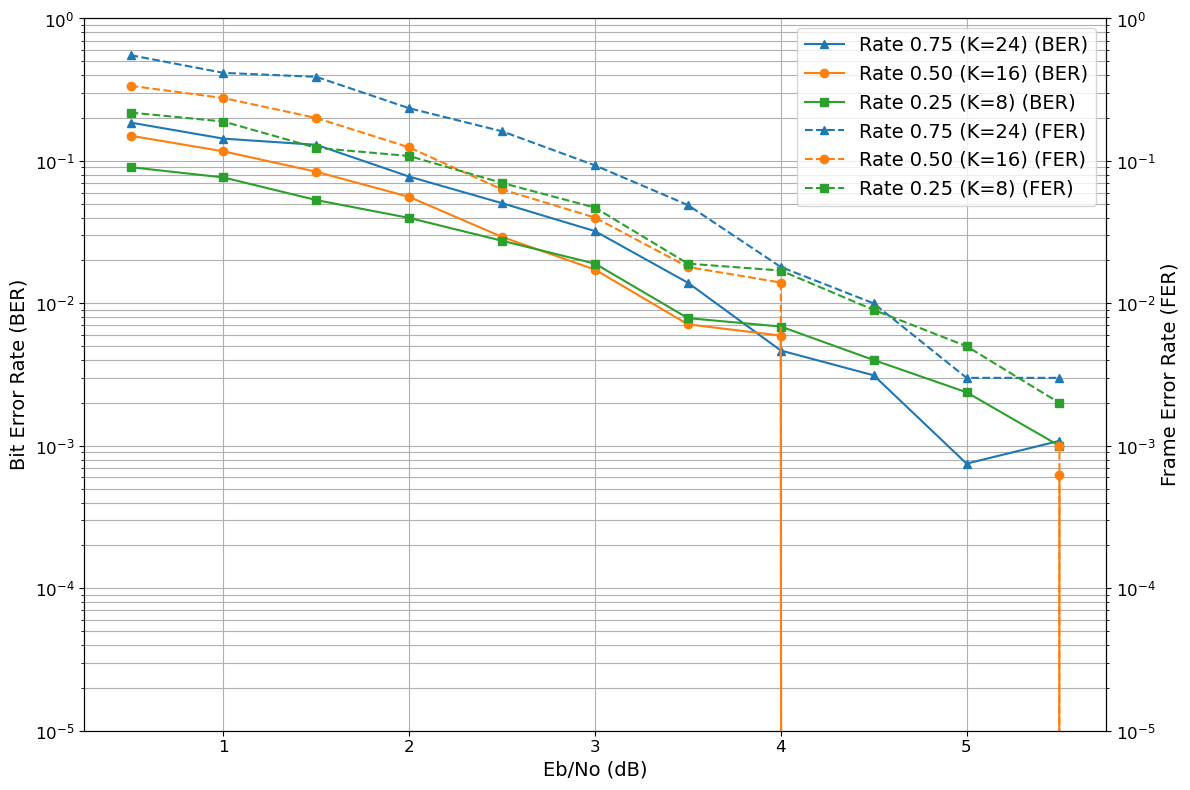

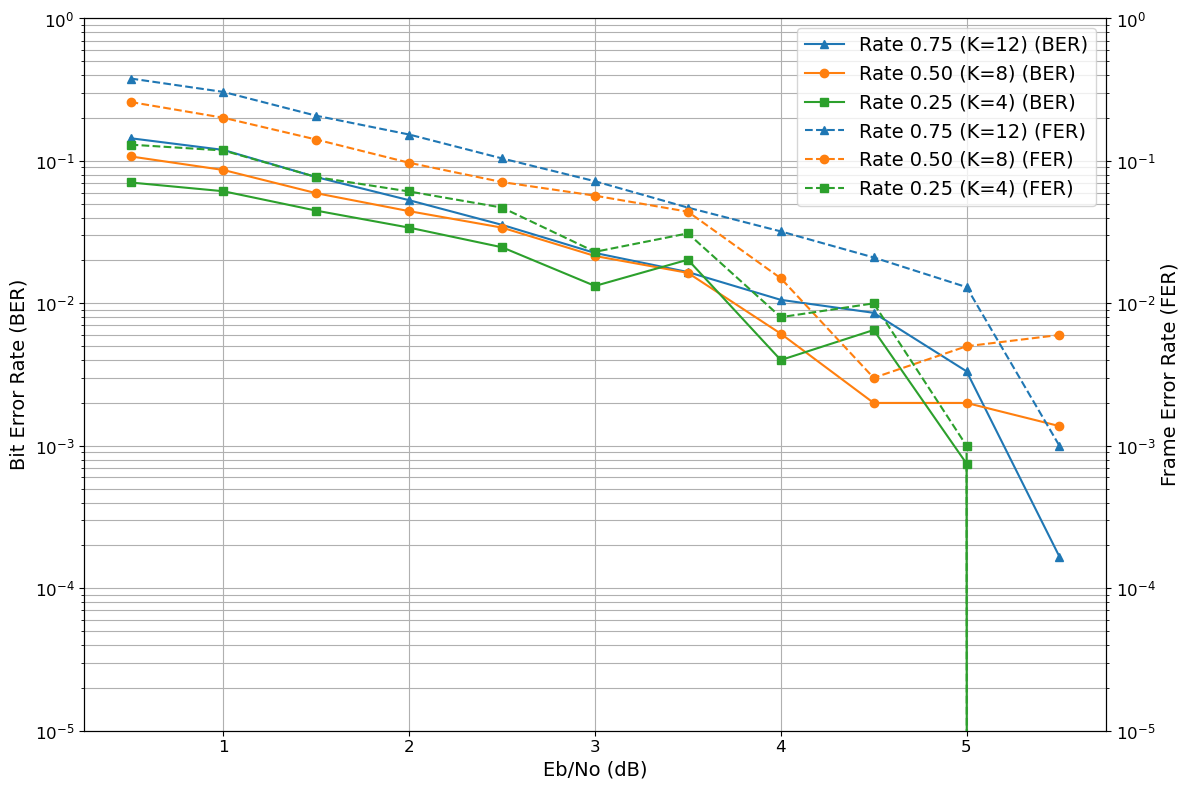

In [7]:
# Loop through the collected results for each codeword length N
for N, results_for_N in all_results.items():
    # Create a figure and a primary axis for BER
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Create a secondary Y-axis for FER, sharing the same X-axis
    ax2 = ax1.twinx()

    # Define a color cycle so that BER and FER curves of a configuration have the same base color
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    # Plot each curve for the current N
    for i, (config_name, results) in enumerate(results_for_N.items()):
        color = colors[i % len(colors)]

        # Get the marker style from the configuration
        marker_style = sim_configs[N][config_name].get("marker", "o-")

        # Plot BER on the primary axis (ax1)
        ax1.semilogy(ebno_db_range, results["ber"], marker_style, color=color, label=f'{config_name} (BER)')

        # Plot FER on the secondary axis (ax2)
        # Use the same marker, but a dashed line style for differentiation
        fer_marker_style = marker_style.replace('-', '--') if '-' in marker_style else marker_style + '--'
        ax2.semilogy(ebno_db_range, results["fer"], fer_marker_style, color=color, label=f'{config_name} (FER)')

    # Title and X-axis (shared)
    #ax1.set_title(f'Performance Comparison of Polar Codes (N={N}) with SC Decoder', fontsize=16)
    ax1.set_xlabel('Eb/No (dB)', fontsize=14)

    # Configuration of the primary Y-axis (BER)
    ax1.set_ylabel('Bit Error Rate (BER)', fontsize=14)
    ax1.set_ylim(1e-5, 1.0) # Adjust as needed for better visibility

    # Configuration of the secondary Y-axis (FER)
    ax2.set_ylabel('Frame Error Rate (FER)', fontsize=14)
    ax2.set_ylim(1e-5, 1.0) # Adjust as needed for better visibility

    # Grid
    ax1.grid(True, which='both')

    ax1.tick_params(axis='x', labelsize=12) # X-Achsen-Zahlen
    ax1.tick_params(axis='y', labelsize=12) # Linke Y-Achsen-Zahlen
    ax2.tick_params(axis='y', labelsize=12)

    # Create combined legend for both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='best', fontsize=14)

    # Optimize layout and display the plot
    fig.tight_layout()
    plt.savefig(f'plots/polar_codes_N{N}_BER_FER.png') # Saves the plot as an image
    plt.show()